# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1

Use the Monte Carlo NVT code we have provided to print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations (of  $M=10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to obtain the Monte Carlo correlation time</span> via a fit with an exponential function. This will suggest you how large should be the blocks in your simulations.


optimized parameters [a,l] = [0.93626258 7.13779891] , parameters uncertainty = [0.02879824 0.43246062]
optimized parameters [a,l] = [0.93970507 8.41587442] , parameters uncertainty = [0.02608722 0.49977455]


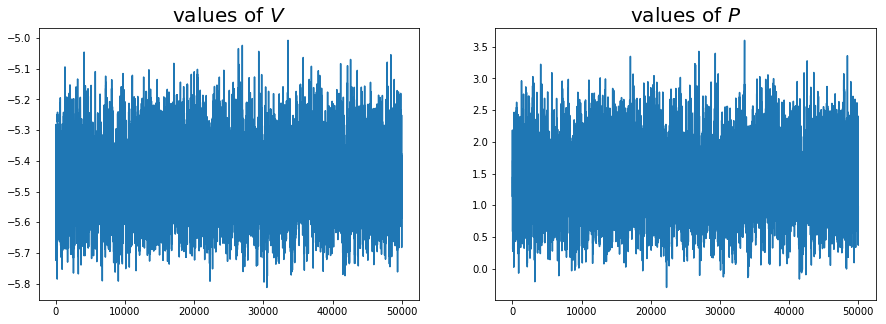

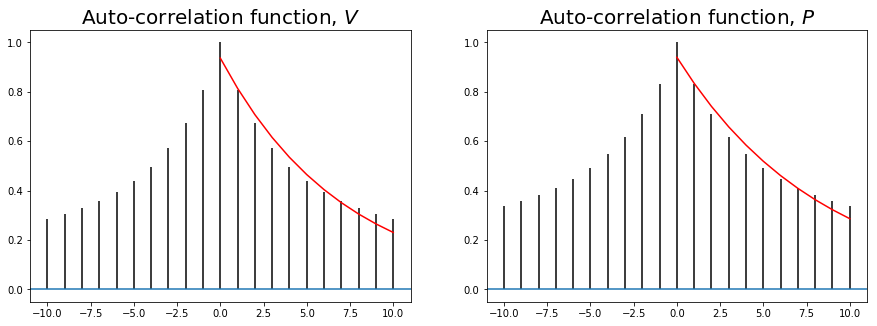

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

def f1(x,a,l):  # defining the fitting function
    return a * np.exp(-x/l)

pot = np.loadtxt("autocorr/liquid_instepot.out",usecols=(0), delimiter=' ', unpack='true')
press = np.loadtxt("autocorr/liquid_instpress.out",usecols=(0), delimiter=' ', unpack='true')

################ INSTANTANEOUS VALUES #################

x = np.arange(len(pot))
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
axs[0].plot(x,pot)
axs[0].set_title("values of $V$",fontsize=20)
axs[1].plot(x,press)
axs[1].set_title("values of $P$",fontsize=20)

#########################################################

Av_pot = np.average(pot)
Av_press = np.average(press)
pot_base = pot-Av_pot
press_base = press-Av_press

################ POWER SPECTRAL DENSITY #########################

#fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
#axs[0].psd(pot_base)
#axs[0].set_title("Power Spectral Density of $V$",fontsize=20)
#axs[1].psd(press_base)
#axs[1].set_title("Power Spectral Density of $P$",fontsize=20)

################ AUTO-CORRELATION ##################################
                         
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
xir = axs[0].acorr(pot_base[1000:],normed=True,maxlags=10)
x = xir[0][10:]
p_opt, p_cov = curve_fit(f1,x,xir[1][10:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[0].plot(x,f_fit,color="r")
axs[0].set_title("Auto-correlation function, $V$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))
yir = axs[1].acorr(press_base[1000:],normed=True,maxlags=10)
x = yir[0][10:]
p_opt, p_cov = curve_fit(f1,x,yir[1][10:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[1].plot(x,f_fit,color="r")
axs[1].set_title("Auto-correlation function, $P$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))

plt.show()

### LIQUID
- $l \approx 7$ per V
- $l \approx 8$ per P

optimized parameters [a,l] = [0.89225259 9.40699166] , parameters uncertainty = [0.01700354 0.26714324]
optimized parameters [a,l] = [0.89557907 9.17344421] , parameters uncertainty = [0.01661823 0.25397953]


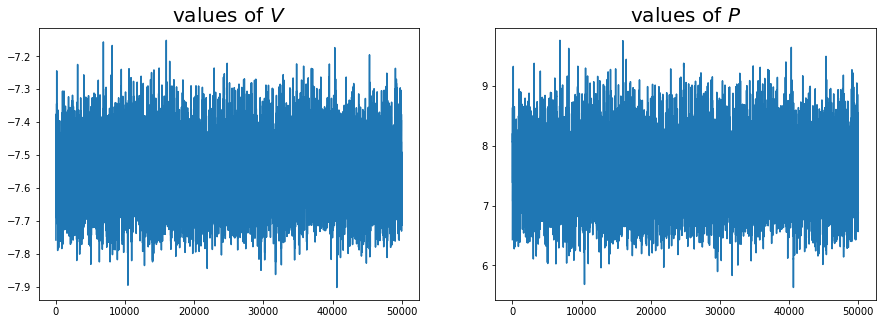

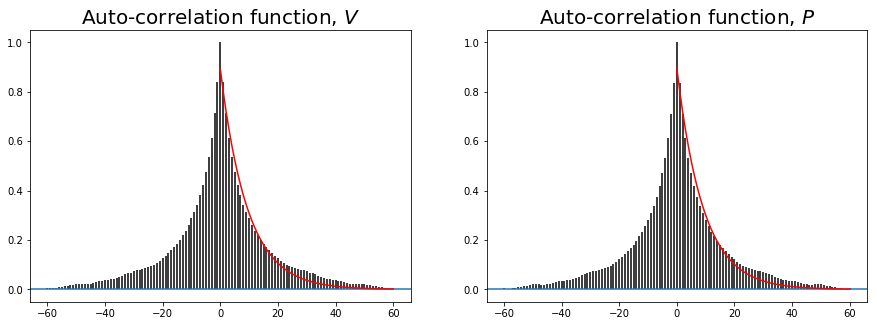

In [22]:
pot = np.loadtxt("autocorr/solid_instepot.out",usecols=(0), delimiter=' ', unpack='true')
press = np.loadtxt("autocorr/solid_instpress.out",usecols=(0), delimiter=' ', unpack='true')

################ INSTANTANEOUS VALUES #################

x = np.arange(len(pot))
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
axs[0].plot(x,pot)
axs[0].set_title("values of $V$",fontsize=20)
axs[1].plot(x,press)
axs[1].set_title("values of $P$",fontsize=20)

######################################################

Av_pot = np.average(pot)
Av_press = np.average(press)
pot_base = pot-Av_pot
press_base = press-Av_press

################ POWER SPECTRAL DENSITY #########################

#fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
#axs[0].psd(pot_base)
#axs[0].set_title("Power Spectral Density of $V$",fontsize=20)
#axs[1].psd(press_base)
#axs[1].set_title("Power Spectral Density of $P$",fontsize=20)

################ AUTO-CORRELATION ##################################
                         
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
xir = axs[0].acorr(pot_base[1000:],normed=True,maxlags=60)
x = xir[0][60:]
p_opt, p_cov = curve_fit(f1,x,xir[1][60:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[0].plot(x,f_fit,color="r")
axs[0].set_title("Auto-correlation function, $V$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))
yir = axs[1].acorr(press_base[1000:],normed=True,maxlags=60)
x = yir[0][60:]
p_opt, p_cov = curve_fit(f1,x,yir[1][60:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[1].plot(x,f_fit,color="r")
axs[1].set_title("Auto-correlation function, $P$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))

plt.show()

### SOLID
- $l \approx 9$ per V
- $l \approx 9$ per P

optimized parameters [a,l] = [ 0.9704638  41.77197447] , parameters uncertainty = [0.01236324 5.5978607 ]
optimized parameters [a,l] = [0.92313742 4.24320557] , parameters uncertainty = [0.02368511 0.17243384]


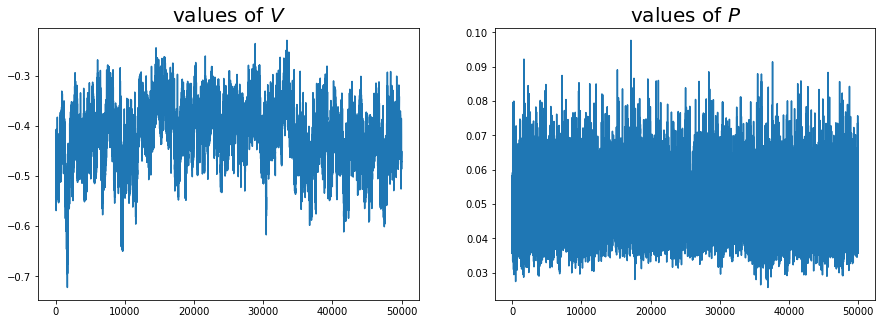

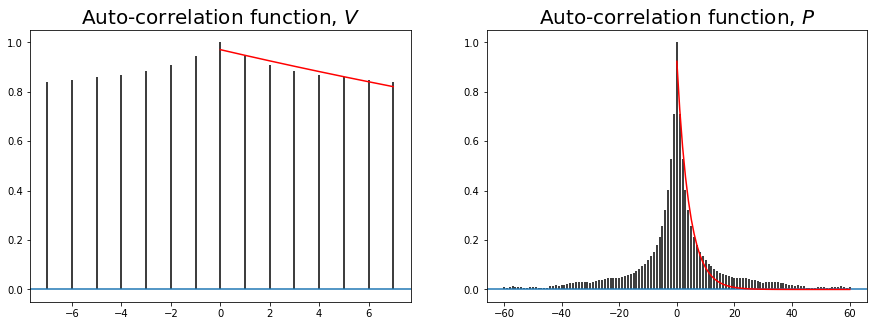

In [23]:
pot = np.loadtxt("autocorr/gas_instepot.out",usecols=(0), delimiter=' ', unpack='true')
press = np.loadtxt("autocorr/gas_instpress.out",usecols=(0), delimiter=' ', unpack='true')

################ INSTANTANEOUS VALUES #################

x = np.arange(len(pot))
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
axs[0].plot(x,pot)
axs[0].set_title("values of $V$",fontsize=20)
axs[1].plot(x,press)
axs[1].set_title("values of $P$",fontsize=20)

##################################################

Av_pot = np.average(pot)
Av_press = np.average(press)
pot_base = pot-Av_pot
press_base = press-Av_press

################ POWER SPECTRAL DENSITY #########################

#fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
#axs[0].psd(pot_base)
#axs[0].set_title("Power Spectral Density of $V$",fontsize=20)
#axs[1].psd(press_base)
#axs[1].set_title("Power Spectral Density of $P$",fontsize=20)

################ AUTO-CORRELATION ##################################
                         
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
xir = axs[0].acorr(pot_base[1000:],normed=True,maxlags=7)
x = xir[0][7:]
p_opt, p_cov = curve_fit(f1,x,xir[1][7:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[0].plot(x,f_fit,color="r")
axs[0].set_title("Auto-correlation function, $V$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))
yir = axs[1].acorr(press_base[1000:],normed=True,maxlags=60)
x = yir[0][60:]
p_opt, p_cov = curve_fit(f1,x,yir[1][60:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[1].plot(x,f_fit,color="r")
axs[1].set_title("Auto-correlation function, $P$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))

plt.show()

### GAS
- $l \approx 42$ per V
- $l \approx 4$ per P

2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

[10, 60, 110, 161, 211, 262, 312, 362, 413, 463, 514, 564, 614, 665, 715, 766, 816, 866, 917, 967, 1018, 1068, 1118, 1169, 1219, 1270, 1320, 1370, 1421, 1471, 1522, 1572, 1622, 1673, 1723, 1774, 1824, 1874, 1925, 1975, 2026, 2076, 2126, 2177, 2227, 2278, 2328, 2378, 2429, 2479, 2530, 2580, 2631, 2681, 2731, 2782, 2832, 2883, 2933, 2983, 3034, 3084, 3135, 3185, 3235, 3286, 3336, 3387, 3437, 3487, 3538, 3588, 3639, 3689, 3739, 3790, 3840, 3891, 3941, 3991, 4042, 4092, 4143, 4193, 4243, 4294, 4344, 4395, 4445, 4495, 4546, 4596, 4647, 4697, 4747, 4798, 4848, 4899, 4949, 5000]


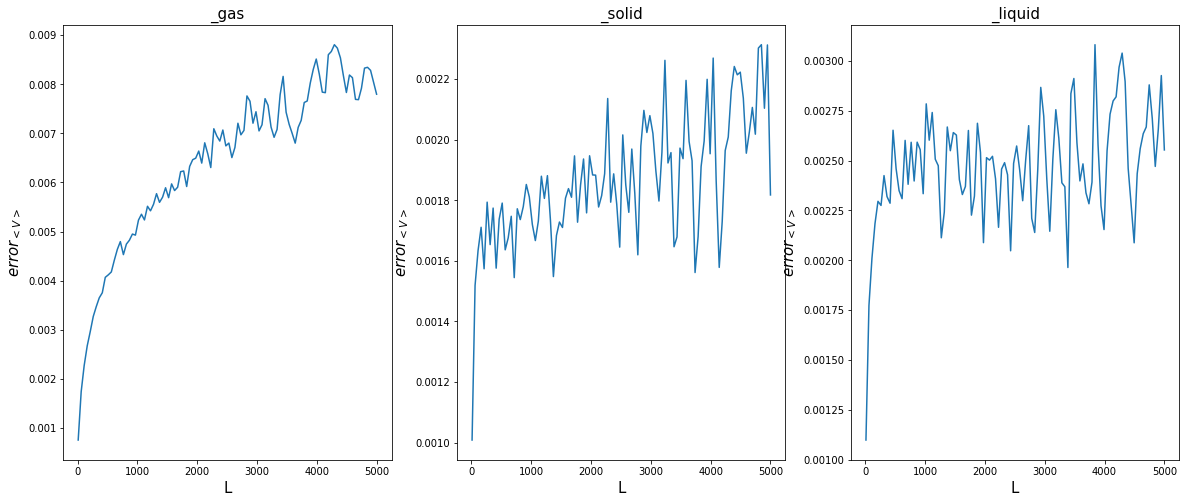

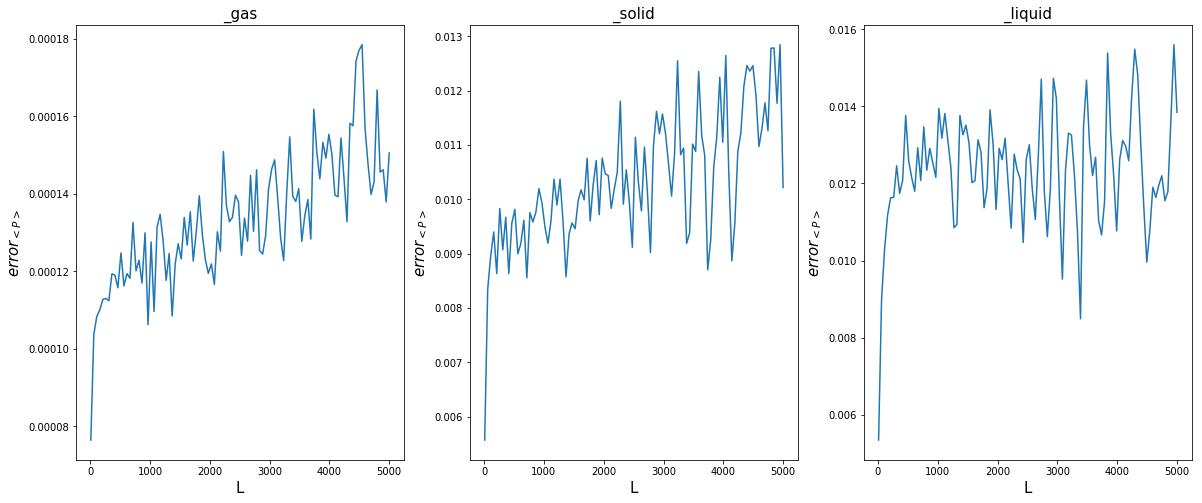

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV,AV2,n):  # Function for statistical uncertainty estimation, come nella spiegazione sotto
    if n==0: #non ha senso calcolarla se ho 0, il blocco è un singolo esperimento con M/N tentativi di osservare
            #la variabile A
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/(n))

pot_gas = np.loadtxt("autocorr/gas_instepot.out",usecols=(0), delimiter=' ', unpack='true')
press_gas = np.loadtxt("autocorr/gas_instpress.out",usecols=(0), delimiter=' ', unpack='true')
pot_solid = np.loadtxt("autocorr/solid_instepot.out",usecols=(0), delimiter=' ', unpack='true')
press_solid = np.loadtxt("autocorr/solid_instpress.out",usecols=(0), delimiter=' ', unpack='true')
pot_liquid = np.loadtxt("autocorr/liquid_instepot.out",usecols=(0), delimiter=' ', unpack='true')
press_liquid = np.loadtxt("autocorr/liquid_instpress.out",usecols=(0), delimiter=' ', unpack='true')

pot = pot_gas,pot_solid,pot_liquid
press = press_gas,press_solid,press_liquid
name = "_gas", "_solid","_liquid"
M=50000   

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(20, 8))

Ls = [int(x) for x in np.linspace(10,5000,100)]
#Ls = [int(x) for x in np.logspace(1,4,20,base=8)]
#Ls[len(Ls)-1] = 5000
#Ls[0] = 10
#print(Ls)

err = np.zeros(len(Ls))

for p in range(3):
    l=0
    for L in Ls:
        N = int(M/L)       
        ave = np.zeros(N)
        av2 = np.zeros(N)
        sum_prog = np.zeros(N)
        su2_prog = np.zeros(N)
        err_prog = np.zeros(N)
        for i in range(N):
            sum = 0
            for j in range(L):
                k = j+i*L
                sum += pot[p][k] #sto facendo il solido
            ave[i] = sum/L       
            av2[i] = (ave[i])**2  
        for i in range(N): 
            for j in range(i+1):
                sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
                su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
            sum_prog[i]/=(i+1) # Cumulative average
            su2_prog[i]/=(i+1) # Cumulative square average
            err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
        err[l] = err_prog[N-1]
        l+=1
    axs[p].plot(Ls,err)
    axs[p].set_xlabel('L',fontsize=15)
    axs[p].set_ylabel('$error_{<V>}$',fontsize=15)
    axs[p].set_title(name[p],fontsize=15)

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(20, 8))

for p in range(3):
    l=0
    for L in Ls:
        N = int(M/L)    
        ave = np.zeros(N)
        av2 = np.zeros(N)
        sum_prog = np.zeros(N)
        su2_prog = np.zeros(N)
        err_prog = np.zeros(N)
        for i in range(N):
            sum = 0
            for j in range(L):
                k = j+i*L
                #sum += pot_solid[k]
                sum += press[p][k] #sto facendo il solido
            ave[i] = sum/L       
            av2[i] = (ave[i])**2  
        for i in range(N): 
            for j in range(i+1):
                sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
                su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
            sum_prog[i]/=(i+1) # Cumulative average
            su2_prog[i]/=(i+1) # Cumulative square average
            err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
        err[l] = err_prog[N-1]
        l+=1
    axs[p].plot(Ls,err)
    axs[p].set_xlabel('L',fontsize=15)
    axs[p].set_ylabel('$error_{<P>}$',fontsize=15)
    axs[p].set_title(name[p],fontsize=15)
    
plt.show()

### Exercise 07.2

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code</span> we have provided: average value of $g(r)$ in each block (with output in the file: output.gofr.0), final average value of $g(r)$ with statistical uncertainties (with output in the file: output.gave.0).

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, inside the previously used Molecular Dynamics code</span>.

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

<span style="color:red">show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

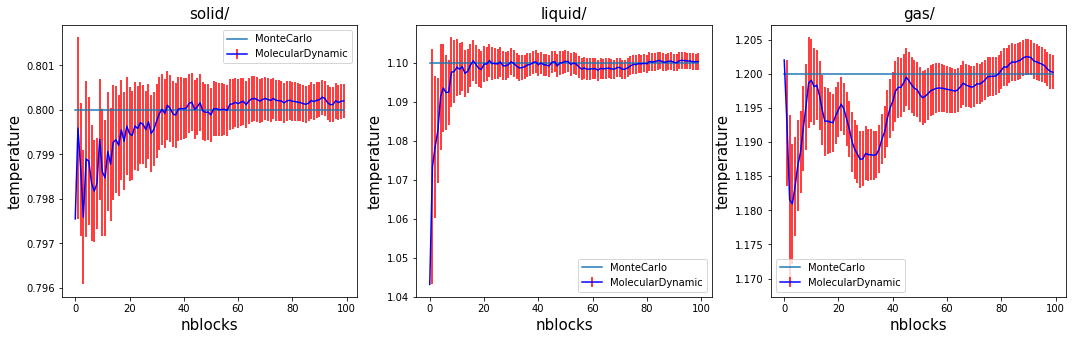

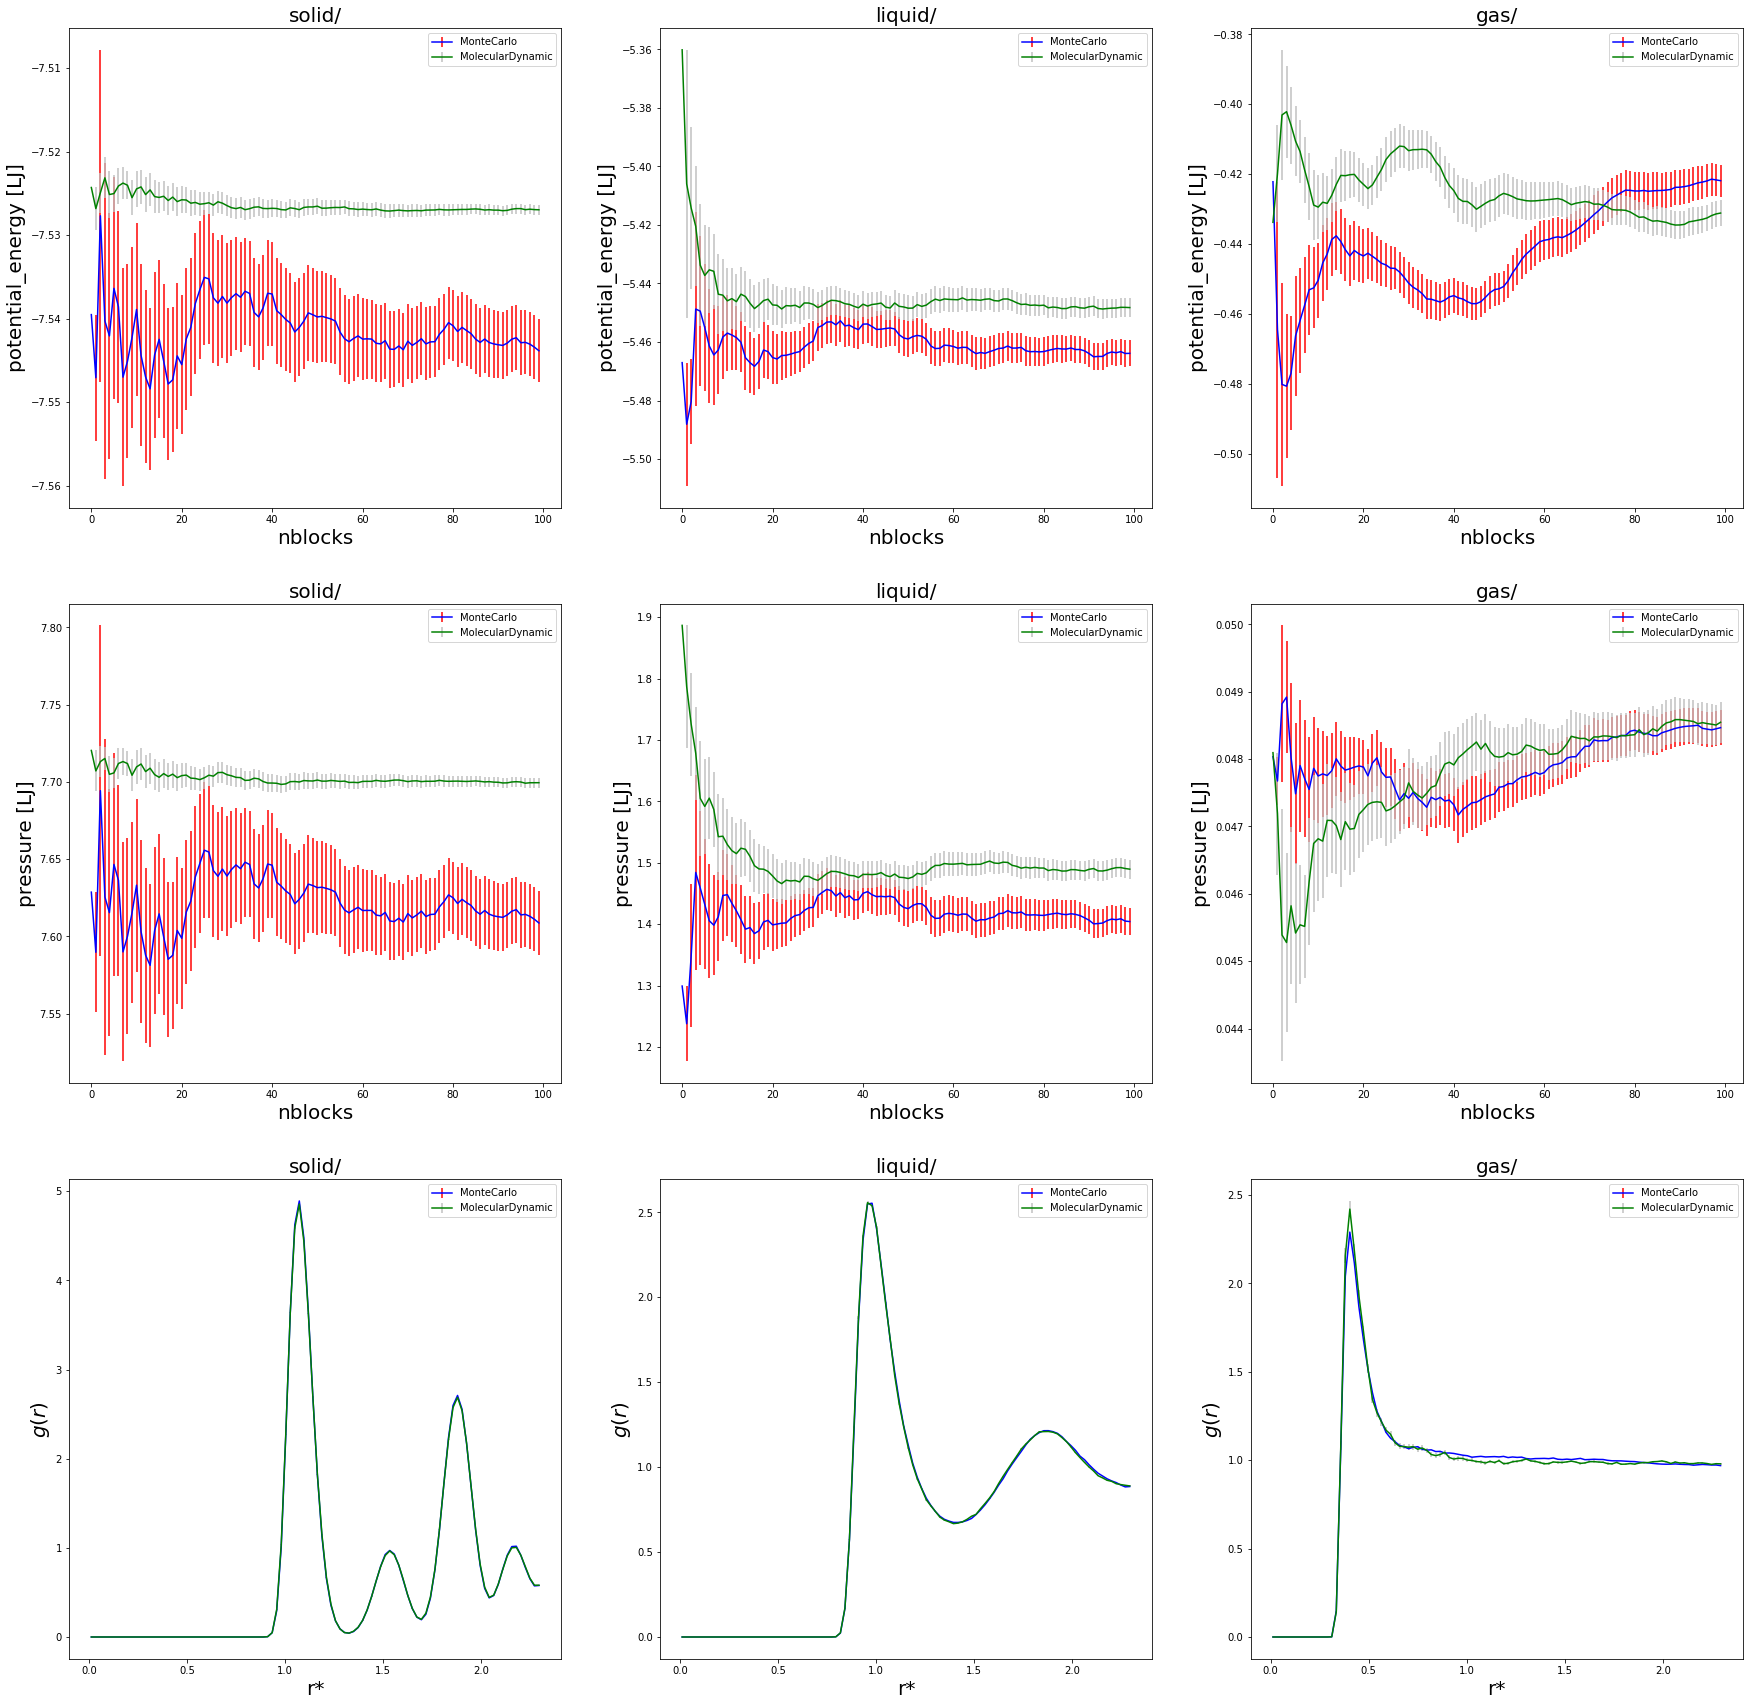

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


folder = "dati_MD/","dati_MC/"
subfolder = "solid/","liquid/","gas/"
nstep=100000
name_MD = "ave_epot"+str(nstep)+".out","ave_press"+str(nstep)+".out","output.gave.out"
name_MC = "output.epot.0","output.pres.0","output.gave.0"
model = "MonteCarlo","MolecularDynamic"
y_lab = "potential_energy [LJ]","pressure [LJ]","$g(r)$"
e_col = "red","blue","green","silver","cyan","ivory","orchid"


N=100
x = np.arange(N)

####################### UNITÀ LJ #########################

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(18, 5)) #su ciascuna colonna solid,liquido,gas
temperature = 0.8,1.1,1.2
for i in range(3):
    y = np.full(N,temperature[i])
    sum_prog,err_prog = np.loadtxt("dati_MD/"+subfolder[i]+"ave_temp100000.out",usecols=(0,1),unpack='true')
    axs[i].errorbar(x,sum_prog,yerr=err_prog,color='b',ecolor='r')
    axs[i].set_xlabel("nblocks",fontsize=15)
    axs[i].set_ylabel("temperature",fontsize=15)
    axs[i].set_title(subfolder[i],fontsize=15)
    axs[i].plot(x,y)
    axs[i].legend(model)
    
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(30, 30)) #su ciascuna colonna solid,liquido,gas

y = np.loadtxt(folder[1]+subfolder[0]+name_MC[2],usecols=(0),unpack='true')
for j in range(3):
        for i in range(3):
                if (j==2):
                    sum_prog,err_prog = np.loadtxt(folder[1]+subfolder[i]+name_MC[j],usecols=(1,2),unpack='true')
                    axs[j][i].errorbar(y,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
                    axs[j][i].set_xlabel("r*",fontsize=20)
                    axs[j][i].set_ylabel(y_lab[j],fontsize=20)
                    #axs[j][i].legend(model)
                    axs[j][i].set_title(subfolder[i],fontsize=20)
                    sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[i]+name_MD[j],usecols=(1,2),unpack='true')
                    axs[j][i].errorbar(y,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
                    axs[j][i].legend(model)
                else:
                    sum_prog,err_prog = np.loadtxt(folder[1]+subfolder[i]+name_MC[j],usecols=(2,3),unpack='true')
                    axs[j][i].errorbar(x,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
                    axs[j][i].set_xlabel("nblocks",fontsize=20)
                    axs[j][i].set_ylabel(y_lab[j],fontsize=20)
                    axs[j][i].set_title(subfolder[i],fontsize=20)
                    axs[j][i].legend(model)
                    sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[i]+name_MD[j],usecols=(0,1),unpack='true')
                    axs[j][i].errorbar(x,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
                    axs[j][i].legend(model)

plt.show()

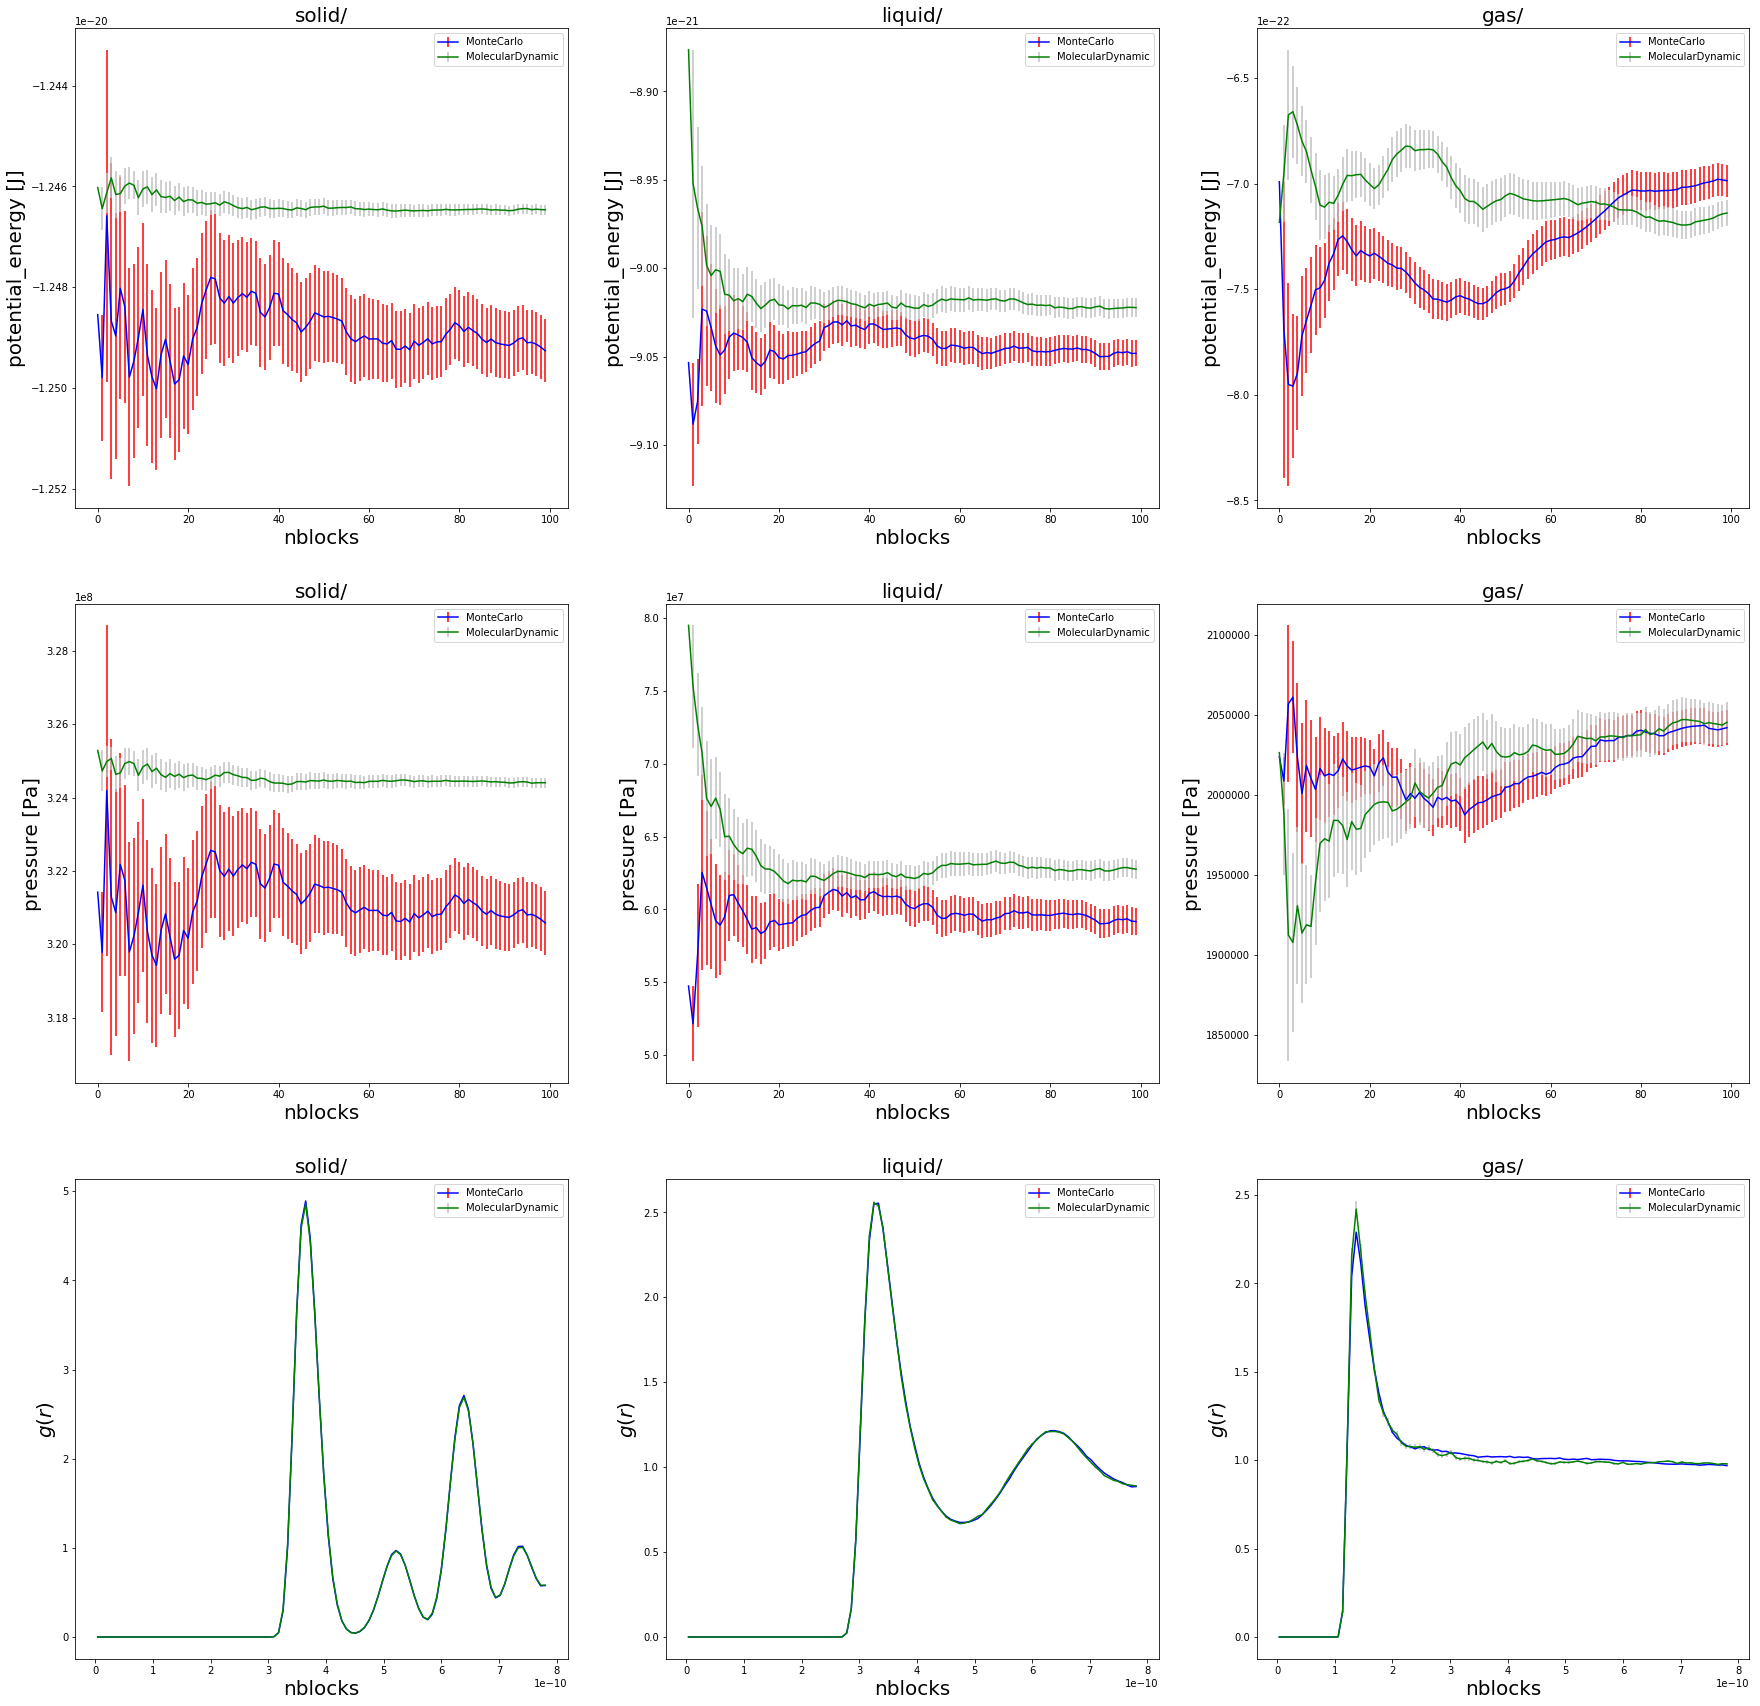

In [27]:
y_lab = "potential_energy [J]","pressure [Pa]","$g(r)$"

######## Argon ##########
sigma = 0.34e-9
eps_kb = 120
Eps = eps_kb*(1.38e-23)
m = 39.948

#pres_factor = Eps/sigma**3
#temp__factor = eps_kb
#energy_factor = Eps

factor = Eps,Eps/sigma**3

fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(30, 30))

y = np.loadtxt(folder[1]+subfolder[0]+name_MC[2],usecols=(0),unpack='true')
y = y*sigma



for j in range(3):
        for i in range(3):
                if (j==2):
                    sum_prog,err_prog = np.loadtxt(folder[1]+subfolder[i]+name_MC[j],usecols=(1,2),unpack='true')
                    axs[j][i].errorbar(y,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
                    axs[j][i].set_xlabel("nblocks",fontsize=20)
                    axs[j][i].set_ylabel(y_lab[j],fontsize=20)
                    #axs[j][i].legend(model)
                    axs[j][i].set_title(subfolder[i],fontsize=20)
                    sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[i]+name_MD[j],usecols=(1,2),unpack='true')
                    axs[j][i].errorbar(y,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
                    axs[j][i].legend(model)
                else:
                    sum_prog,err_prog = np.loadtxt(folder[1]+subfolder[i]+name_MC[j],usecols=(2,3),unpack='true')
                    sum_prog*=factor[j]
                    err_prog*=factor[j]
                    axs[j][i].errorbar(x,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
                    axs[j][i].set_xlabel("nblocks",fontsize=20)
                    axs[j][i].set_ylabel(y_lab[j],fontsize=20)
                    axs[j][i].set_title(subfolder[i],fontsize=20)
                    axs[j][i].legend(model)
                    sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[i]+name_MD[j],usecols=(0,1),unpack='true')
                    sum_prog*=factor[j]
                    err_prog*=factor[j]
                    axs[j][i].errorbar(x,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
                    axs[j][i].legend(model)
                    
plt.show()
                    

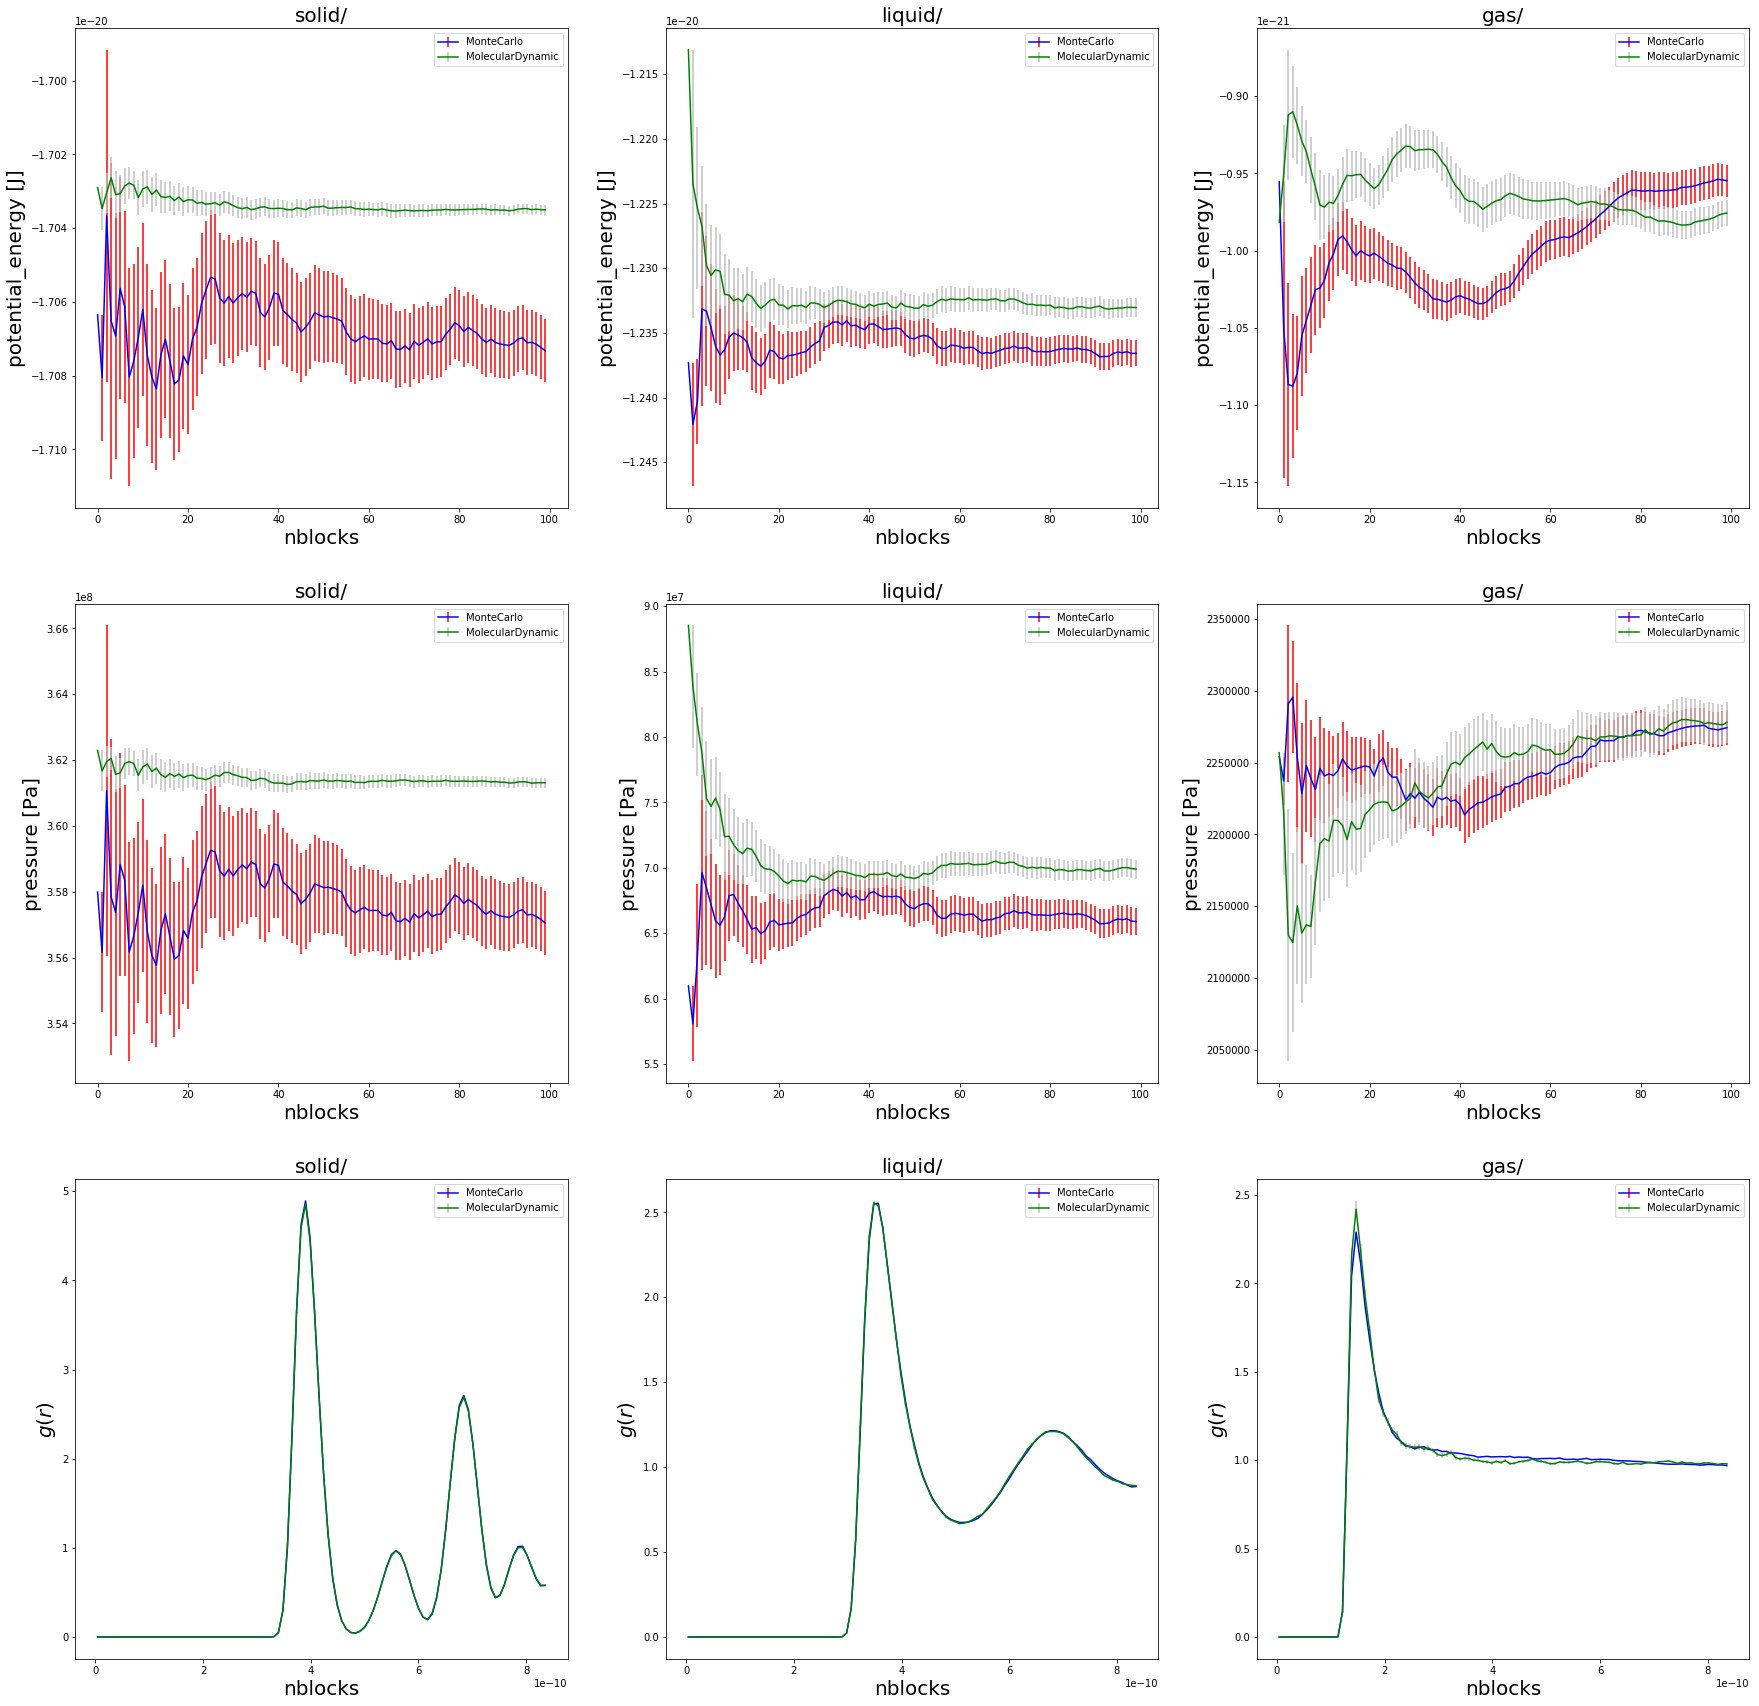

In [28]:
######## Krypton ##########
sigma = 0.364e-9
eps_kb = 164
Eps = eps_kb*(1.38e-23)
m = 83.798

factor = Eps,Eps/sigma**3

fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(30, 30))

y = np.loadtxt(folder[1]+subfolder[0]+name_MC[2],usecols=(0),unpack='true')
y = y*sigma



for j in range(3):
        for i in range(3):
                if (j==2):
                    sum_prog,err_prog = np.loadtxt(folder[1]+subfolder[i]+name_MC[j],usecols=(1,2),unpack='true')
                    axs[j][i].errorbar(y,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
                    axs[j][i].set_xlabel("nblocks",fontsize=20)
                    axs[j][i].set_ylabel(y_lab[j],fontsize=20)
                    #axs[j][i].legend(model)
                    axs[j][i].set_title(subfolder[i],fontsize=20)
                    sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[i]+name_MD[j],usecols=(1,2),unpack='true')
                    axs[j][i].errorbar(y,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
                    axs[j][i].legend(model)
                else:
                    sum_prog,err_prog = np.loadtxt(folder[1]+subfolder[i]+name_MC[j],usecols=(2,3),unpack='true')
                    sum_prog*=factor[j]
                    err_prog*=factor[j]
                    axs[j][i].errorbar(x,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
                    axs[j][i].set_xlabel("nblocks",fontsize=20)
                    axs[j][i].set_ylabel(y_lab[j],fontsize=20)
                    axs[j][i].set_title(subfolder[i],fontsize=20)
                    axs[j][i].legend(model)
                    sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[i]+name_MD[j],usecols=(0,1),unpack='true')
                    sum_prog*=factor[j]
                    err_prog*=factor[j]
                    axs[j][i].errorbar(x,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
                    axs[j][i].legend(model)
                    
plt.show()